[-0.67818267-0.64442672j -0.29409826+0.79686537j  0.89047182-0.3702952j
 -1.71888047+0.52303463j -1.33442812-0.31042635j  0.54964423+0.15311226j
  0.23422861-1.2097154j  -0.87513447+1.05209053j]


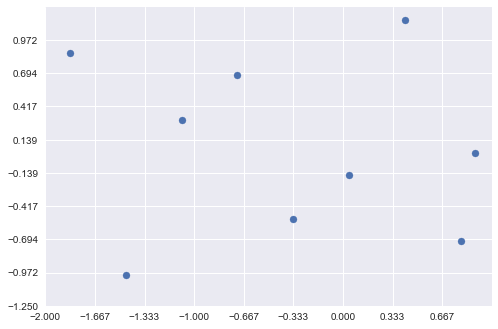

[ 0.88495862+0.02864198j -1.83379138+0.86197531j -0.33379138-0.52691358j
 -1.08379138+0.30641975j  0.41620862+1.13975309j -1.45879138-0.98987654j
  0.04120862-0.15654321j -0.70879138+0.67679013j  0.79120862-0.71209876j]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sampling_functions import generate_Orthogonal, generate_sobol
from mandelbrot_matrix import SEED
from simulation_functions import run_simulation

In [2]:
sample_size = []
# Sample size is power of 2 and perfect square. This is done to get optimum performance for both orthogonal and Sobol Sampling.
# In this project, orthogonal is desgined for a perfect square sample size
# Sobol is implemented for sample sizes of power of 2
# Their performance is very close with respect to the converegnce rate for a Mandelbrot Area.
# Therefore, to analyze their unbiased Area estimation we have taken a samples size which is a power of 2 and a perfect square.


for num in range(8,17,2):
    sample_size.append(np.power(2,num))
    
test_functions = [generate_Orthogonal, generate_sobol]
np.random.seed(SEED)
    

simulation_runs = 500
threshold_iterations = 1000

std_orthogonal = []
std_sobol = []

for sample in sample_size:
    
    for i in range(len(test_functions)):
        mean_area, std_area, calc_time, sample_data = run_simulation(simulation_runs,sample,threshold=threshold_iterations,re_lim=(-2,1), im_lim=(-1.25,1.25), function=test_functions[i])
        if(i%2 == 0):
            std_orthogonal.append(std_area)
        else:
            std_sobol.append(std_area)
        print(std_area)

  0%|          | 0/500 [00:00<?, ?it/s]

0.07073144233949145


  0%|          | 0/500 [00:00<?, ?it/s]

0.06494355318349664


  0%|          | 0/500 [00:00<?, ?it/s]

0.026059710291571773


  0%|          | 0/500 [00:00<?, ?it/s]

0.02428395949162746


  0%|          | 0/500 [00:00<?, ?it/s]

0.01013563051060239


  0%|          | 0/500 [00:00<?, ?it/s]

0.009095378543107411


  0%|          | 0/500 [00:00<?, ?it/s]

0.0042216100534788895


  0%|          | 0/500 [00:00<?, ?it/s]

0.003810978106426666


  0%|          | 0/500 [00:00<?, ?it/s]

0.0015988768325505055


  0%|          | 0/500 [00:00<?, ?it/s]

0.0013461154702554667


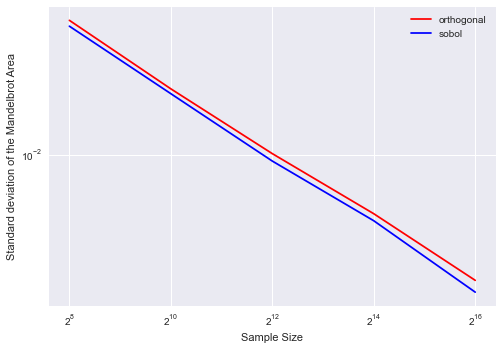

In [12]:
# Here, we see that Sobol has smaller standard deviation(variance = square(standard_deviation)) as compared to orthogonal
# sampling for the same sample size. Therefore, we get a slightly better converegence with the quasi monte carlo method.
plt.plot(sample_size, std_orthogonal, label = "orthogonal",color='r')
plt.plot(sample_size, std_sobol, label = "sobol",color='b')

plt.xscale("log", base = 2)
plt.xticks(sample_size)
plt.xlabel("Sample Size")

plt.yscale("log")
plt.ylabel("Standard deviation of the Mandelbrot Area")
plt.legend()
plt.show()